### Task 1

In [28]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 

In [29]:
#Data 
column_names = ['X1', 'X2']
data1 = pd.read_csv('./Data/Train1.txt', sep='  ',names=column_names, engine='python')
data1['Y'] = 0
data2 = pd.read_csv('./Data/Train2.txt', sep='  ',names=column_names, engine='python')
data2['Y'] = 1

#Training Data
train_data1 = data1[:1500]
train_data2 = data2[:1500]
train_data = pd.concat([train_data1, train_data2], axis=0)
train_data = train_data.sample(frac=1, random_state=42)
train_data

,X1,X2,Y
301,0.091941,1.837668,1
1190,-0.014350,4.257018,0
317,0.919405,0.896911,1
251,6.693949,2.782470,0
1005,-2.936276,6.136000,1
...,...,...,...
138,-4.599158,6.783653,1
1095,-2.340597,0.616285,0
1130,2.120874,-0.105287,0
1294,5.876983,2.702744,0


In [30]:
#Validation Data
val_data1 = data1[1500:]
val_data2 = data2[1500:]
val_data = pd.concat([val_data1, val_data2], axis=0)
val_data = val_data.sample(frac=1, random_state=42)
val_data

,X1,X2,Y
1521,0.808004,0.981805,1
1737,0.242729,0.055110,1
1740,0.577348,2.038684,1
1660,-2.578603,4.845683,1
1911,-0.528039,4.241577,0
...,...,...,...
1606,-0.925488,6.151985,0
1770,4.229215,3.202321,0
1860,-1.241297,6.849459,1
1935,-0.189627,2.274401,0


In [31]:
#Testing Data 
column_names = ['X1', 'X2']
test_data1 = pd.read_csv('./Data/Test1.txt', sep='  ',names=column_names, engine='python')
test_data1['Y'] = 0

test_data2 = pd.read_csv('./Data/Test2.txt', sep='  ',names=column_names, engine='python')
test_data2['Y'] = 1

test_data = pd.concat([train_data1, train_data2], axis=0)
test_data = train_data.sample(frac=1, random_state=42)
test_data

,X1,X2,Y
1130,1.586836,-0.692727,1
602,0.284377,-0.212919,1
1141,-4.084149,5.645989,1
1299,3.031549,1.838608,0
616,0.813974,0.807714,0
...,...,...,...
61,-2.308666,1.819128,1
738,-0.743318,4.364018,1
311,3.339240,2.978150,1
377,1.129302,1.728445,0


In [32]:
#Data Normalization
train_data['X1'] = train_data['X1'] - train_data['X1'].mean() / train_data['X1'].std()
train_data['X2'] = train_data['X2'] - train_data['X2'].mean() / train_data['X2'].std()
train_data

,X1,X2,Y
301,-0.378208,0.514036,1
1190,-0.484499,2.933386,0
317,0.449256,-0.426721,1
251,6.223800,1.458838,0
1005,-3.406425,4.812368,1
...,...,...,...
138,-5.069307,5.460021,1
1095,-2.810746,-0.707347,0
1130,1.650725,-1.428919,0
1294,5.406834,1.379112,0


In [33]:
#Data Reshaping 
X_train = train_data.iloc[:,:2].values
X_train = np.reshape(X_train, (3000,2,1))
X_val = train_data.iloc[:,:2].values
X_val = np.reshape(X_val, (3000,2,1))
X_test = test_data.iloc[:,:2].values
X_test = np.reshape(X_test, (3000,2,1))

Y_train = train_data.iloc[:,-1].values
Y_train = np.reshape(Y_train, (3000,1,1))
Y_val = train_data.iloc[:,-1].values
Y_val = np.reshape(X_val, (3000,2,1))
Y_test = test_data.iloc[:,-1].values
Y_test = np.reshape(Y_test, (3000,1,1))

In [34]:
#Initializing Layer Structure 
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward(self, input):
        pass
    
    def backward(self, output_gradient, learning_rate):
        pass

In [35]:
#Initializing the Dense Layer 
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.rand(output_size, 1)
        
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

In [36]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [37]:
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2
        super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)
        super().__init__(sigmoid, sigmoid_prime)
        
class Relu(Activation):
    def __init__(self):
        def relu(x):
            return np.maximum(0,x)
        def relu_prime(x):
            return 1 * (x>=0)     
        super().__init__(relu, relu_prime)

class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    def backward(self, output_gradient, learning_rate):
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)

In [38]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [43]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def accuracy(network, X, Y):
    acc = 0
    for x,y in zip(X_test, Y_test):
        y_pred = predict(network, x)
        if(y_pred<0.5):
            class_label = [[0]]
        else:
            class_label = [[1]]
        if class_label==y:
            acc+=1
    return acc/X.shape[0] * 100


def train(network, loss, loss_prime, x_train, y_train, x_val, y_val, x_test, y_test, epochs = 1000, learning_rate = 0.01, verbose = True):
    prev_val_error = float('inf')
    no_improvement_count = 0 
    
    training_errors = []
    validation_errors = []
    test_errors = []

    
    for e in range(epochs):
        train_error = 0
        val_error = 0
        test_error = 0
        
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            train_error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)
            

        train_error /= len(x_train)
        training_errors.append(train_error)
        
        # Validation phase
        for x_val_sample, y_val_sample in zip(x_val, y_val):
            val_output = predict(network, x_val_sample)
            val_error += loss(y_val_sample, val_output)
        val_error /= len(x_val)
        validation_errors.append(val_error)
        
        # Test phase
        for x_test_sample, y_test_sample in zip(x_test, y_test):
            test_output = predict(network, x_test_sample)
            test_error += loss(y_test_sample, test_output)
        test_error /= len(x_test)
        test_errors.append(test_error)
        
        
        if abs(prev_val_error - val_error) <= 1e-3:
            no_improvement_count += 1
        else:
            no_improvement_count = 0 
        
        if no_improvement_count >= 5:
            print(f"Early stopping at epoch {e}. Error has not changed significantly.")
            return training_errors, validation_errors, test_errors
            break
            
        prev_val_error = val_error
        
        if verbose and (e+1)%100==0:
                acc = accuracy(network, x_val, y_val)
                print(f"{e + 1}/{epochs}, error={(train_error):.4f}, training accuracy={(acc):.4f}%")
    return training_errors, validation_errors, test_errors

============training with 4 nodes==================
100/10000, error=0.1493, training accuracy=68.2000%
Early stopping at epoch 136. Error has not changed significantly.


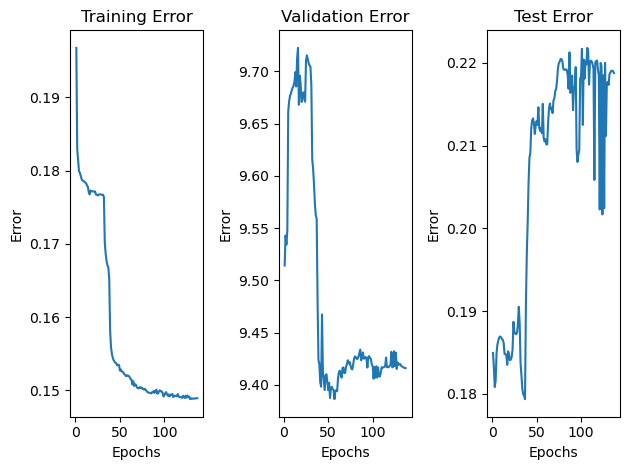

============training with 8 nodes==================
100/10000, error=0.1361, training accuracy=73.0333%
200/10000, error=0.1370, training accuracy=72.2667%
300/10000, error=0.1356, training accuracy=69.9000%
400/10000, error=0.1362, training accuracy=70.1667%
500/10000, error=0.1361, training accuracy=70.5333%
600/10000, error=0.1360, training accuracy=70.5333%
Early stopping at epoch 638. Error has not changed significantly.


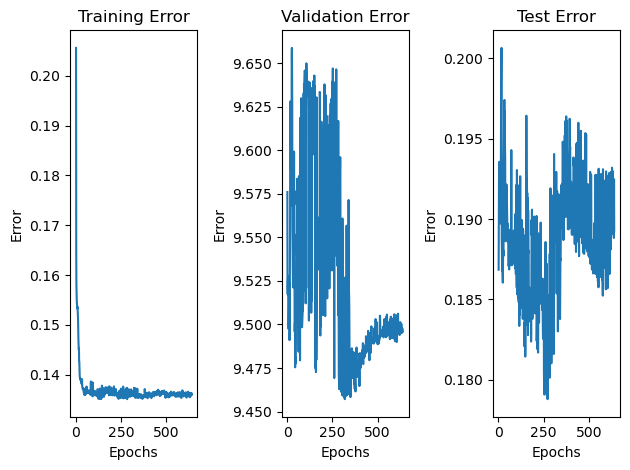

============training with 10 nodes==================
100/10000, error=0.1355, training accuracy=72.2000%
Early stopping at epoch 119. Error has not changed significantly.


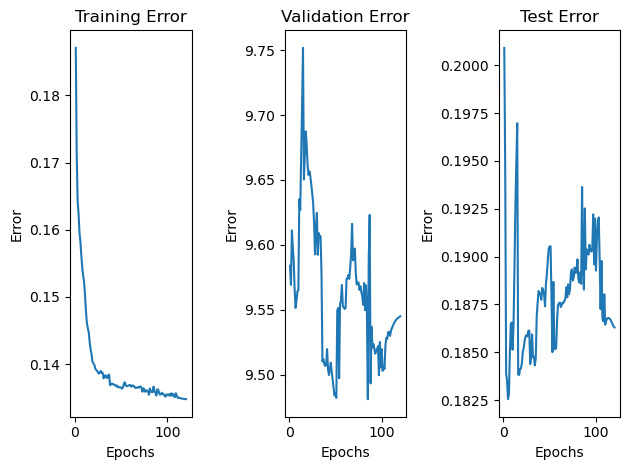

============training with 12 nodes==================
100/10000, error=0.1363, training accuracy=73.5667%
200/10000, error=0.1353, training accuracy=72.3333%
300/10000, error=0.1348, training accuracy=72.2000%
400/10000, error=0.1349, training accuracy=71.8333%
500/10000, error=0.1355, training accuracy=71.9333%
600/10000, error=0.1349, training accuracy=72.1000%
Early stopping at epoch 603. Error has not changed significantly.


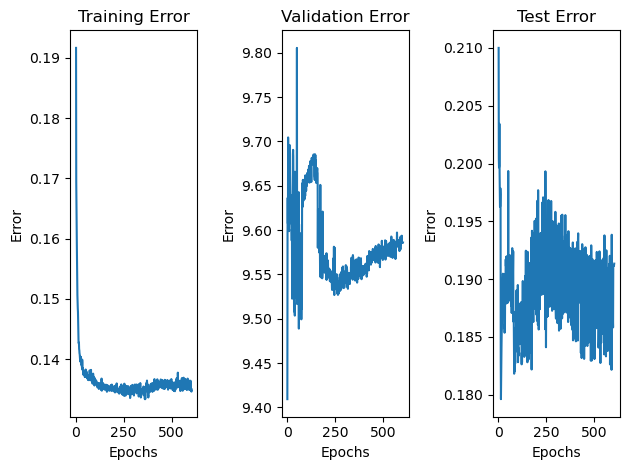

============training with 14 nodes==================
100/10000, error=0.1365, training accuracy=73.8667%
200/10000, error=0.1355, training accuracy=73.7333%
Early stopping at epoch 263. Error has not changed significantly.


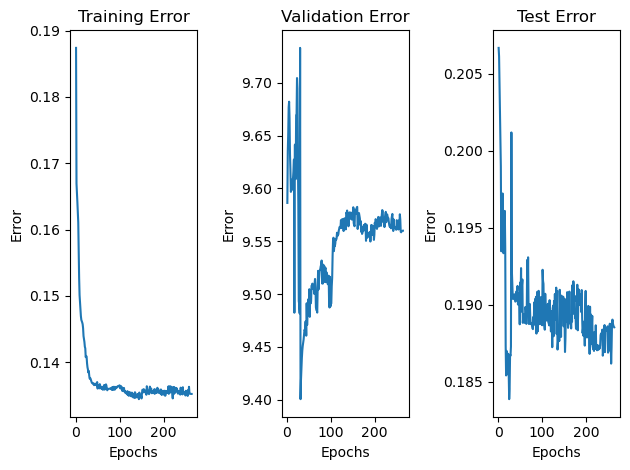

In [45]:
#Network with 4,8,10,12,14
def train_with_nh(n_hidden):
    print("============training with", n_hidden, "nodes==================")
    network = [
        Dense(2, n_hidden),
        Tanh(),
        Dense(n_hidden, 1),
        Sigmoid()
    ]
    # train
    training_errors, validation_errors, test_errors = train(network, mse, mse_prime, X_train, Y_train, X_val, Y_val, X_test, Y_test, epochs=10000, learning_rate=0.1)
    epochs = np.linspace(1,len(training_errors),num=len(training_errors))
    # Plotting training error
    plt.subplot(1, 3, 1)
    plt.plot(epochs, training_errors)
    plt.title('Training Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')

    # Plotting validation error
    plt.subplot(1, 3, 2)
    plt.plot(epochs, validation_errors)
    plt.title('Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')

    # Plotting test error
    plt.subplot(1, 3, 3)
    plt.plot(epochs, test_errors)
    plt.title('Test Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error')

    plt.tight_layout()  
    plt.show()
    
    return network

networks =  {}
for i in [4,8,10,12,14]:
    network = train_with_nh(i)
    networks['network'+str(i)] = network

#### Task 2

In [46]:
from keras.datasets import mnist

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
#One-hot encoding
from keras.utils import to_categorical

y_hot_train = to_categorical(y_train, 10)
y_hot_test = to_categorical(y_test, 10)

In [49]:
#Data Preprocessing 
x_train = x_train / x_train.max()
#Adding a color channel
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [50]:
#Creating the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [51]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(28,28,1), strides=1))

model.add(MaxPool2D(pool_size = (2,2), strides = 1))

model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 input_shape=(28,28,1), strides=1))

model.add(MaxPool2D(pool_size = (2,2), strides = 1))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer='rmsprop',
            metrics = ['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [53]:
model.fit(x_train, y_hot_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1279 - accuracy: 0.9620
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0508 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0370 - accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0293 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0237 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0212 - accuracy: 0.9952
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0202 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0171 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0153 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [54]:
model.evaluate(x_test,y_hot_test)

313/313 [==============================] - 1s 2ms/step - loss: 106.5537 - accuracy: 0.9697


[106.55370330810547, 0.9696999788284302]

In [55]:
#Models

#Model1 -> Changing the filter size 
model1 = Sequential()

model1.add(Conv2D(filters=8, kernel_size=(3,3), 
                  input_shape=(28,28,1), strides=1))

model1.add(MaxPool2D(pool_size = (2,2), strides = 1))

model1.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(28,28,1), strides=1))

model1.add(MaxPool2D(pool_size = (2,2), strides = 1))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add(Dense(64, activation='relu'))

model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop',
                metrics = ['accuracy'])

model.fit(x_train, y_hot_train, epochs=3)

model.evaluate(x_test,y_hot_test)

Epoch 1/3
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0114 - accuracy: 0.9982
Epoch 2/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0136 - accuracy: 0.9980
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 73.6989 - accuracy: 0.9828


[73.69891357421875, 0.9828000068664551]

In [56]:
#Model2 -> Changing the number of neurons in the fully connected layer 
model2 = Sequential()

model2.add(Conv2D(filters=8, kernel_size=(3,3), 
                  input_shape=(28,28,1), strides=1))

model2.add(MaxPool2D(pool_size = (2,2), strides = 1))

model2.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(28,28,1), strides=1))

model2.add(MaxPool2D(pool_size = (2,2), strides = 1))

model2.add(Flatten())

model2.add(Dense(32, activation='relu'))

model2.add(Dense(16, activation='relu'))

model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop',
                metrics = ['accuracy'])

model2.fit(x_train, y_hot_train, epochs=3)

model2.evaluate(x_test,y_hot_test)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1999 - accuracy: 0.9406
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0717 - accuracy: 0.9788
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 53.2976 - accuracy: 0.9173


[53.29759979248047, 0.9172999858856201]

In [57]:
#Model3 -> Changing the learning rate 
from tensorflow.keras.optimizers import RMSprop

model4 = Sequential()

model4.add(Conv2D(filters=8, kernel_size=(3,3), 
                  input_shape=(28,28,1), strides=1))

model4.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(28,28,1), strides=1))

model4.add(MaxPool2D(pool_size = (2,2), strides = 1))

model4.add(Flatten())

model4.add(Dense(32, activation='sigmoid'))

model4.add(Dense(16, activation='sigmoid'))

model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001),
                metrics = ['accuracy'])

model4.fit(x_train, y_hot_train, epochs=3)

model4.evaluate(x_test,y_hot_test)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7304 - accuracy: 0.6780
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2134 - accuracy: 0.8620
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.8563 - accuracy: 0.8532


[0.856272280216217, 0.8532000184059143]

In [59]:
#Model4 -> Changing the stride
from tensorflow.keras.optimizers import RMSprop

model4 = Sequential()

model4.add(Conv2D(filters=8, kernel_size=(3,3), 
                  input_shape=(28,28,1), strides=3))

model4.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(28,28,1), strides=3))

model4.add(MaxPool2D(pool_size = (2,2), strides = 3))

model4.add(Flatten())

model4.add(Dense(32, activation='sigmoid'))

model4.add(Dense(16, activation='sigmoid'))

model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001),
                metrics = ['accuracy'])

model4.fit(x_train, y_hot_train, epochs=3)

model4.evaluate(x_test,y_hot_test)

Epoch 1/3
1875/1875 [==============================] - 1s 635us/step - loss: 2.3013 - accuracy: 0.1637
Epoch 2/3
1875/1875 [==============================] - 1s 610us/step - loss: 1.9875 - accuracy: 0.3622
Epoch 3/3
313/313 [==============================] - 0s 353us/step - loss: 1.5273 - accuracy: 0.5717


[1.527294635772705, 0.5716999769210815]

In [58]:
#Model5 -> Changing the loss function 
model5 = Sequential()

model5.add(Conv2D(filters=8, kernel_size=(3,3), 
                  input_shape=(28,28,1), strides=1))

model5.add(MaxPool2D(pool_size = (2,2), strides = 1))

model5.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=(28,28,1), strides=1))

model5.add(MaxPool2D(pool_size = (2,2), strides = 1))

model5.add(Flatten())

model5.add(Dense(32, activation='relu'))

model5.add(Dense(16, activation='relu'))

model5.add(Dense(10, activation='softmax'))

model5.compile(loss='mean_squared_error', optimizer='rmsprop',
                metrics = ['accuracy'])

model5.fit(x_train, y_hot_train, epochs=3)

model5.evaluate(x_test,y_hot_test)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0092 - accuracy: 0.9380
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0037 - accuracy: 0.9765
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0086 - accuracy: 0.9567


[0.008641347289085388, 0.9567000269889832]